## How to access data 
1. Go to https://soar.esac.esa.int/soar/
2. Navigate to "Search" on the left-hand menu 
3. Select a date interval, e.g., from 2022-03-08 to 2022-03-09, choose "Solar Wind Analyzer", and "L2" for data product level. 
4. Click "Search" at the bottom. You will see all data products from SWA. 

## PAS L2 data 
There are 3 data products from PAS. 
1. **Moments computed from the Proton part of ion distribution function**
e.g., *solo_L2_swa-pas-grnd-mom_20220308_V02.cdf* 
2. **Differential energy flux**
e.g., *solo_L2_swa-pas-eflux_20220308_V02.cdf* 
3. **Ion phase space density distribution function**
e.g., *solo_L2_swa-pas-vdf_20220308_V02.cdf* 

In this demonstration, we will load and visualise data from the first two files. These two files have been downloaded for the demo purposes under the directory `Data-for-demo/`

## Prerequisites

We will use Python 3 (this example was tested with version 3.7.6) and Python libraries [**SpacePy**](https://spacepy.github.io), [**Numpy**](https://numpy.org/), and  [**Matplotlib**](https://matplotlib.org/). For the **SpacePy** library, we will specifically import the module *pycdf* for reading in a CDF file. This *pycdf* module is dependent on the [NASA CDF library](https://cdf.gsfc.nasa.gov/). If you do not already have these libraries installed, the following instruction should get your system ready. Alternatively, you may install **SpacePy**, **NASA's CDF library**, and **Matplotlib** using instructions provided on their websites.

> (Optional) To avoid conflict with your pre-installed libraries, we will employ a virtual Python environment. Following the steps below in your terminal (Mac/Windows/Linux) should set you up with a virtual environment called "env-pas-demo".  
`pip install virtualenv
python3.7 -m venv env-pas-demo
source env-pas-demo/bin/activate`

> Now your virtual environment should be activated; you can see `(env-pas-demo)` at the beginning of your terminal command. 

> Then, we can install the dependencies by typing in the terminal (with the virtual environment on).  
`pip install -r requirements.txt`

> To deactivate the virtual environment (once finishing the demo), type  
`deactivate`

To install the NASA CDF library for **SpacePy** *pycdf*, you can follow the instructions [here](https://spacepy.github.io/install.html). Note that this is platform-dependent; please select Mac, Windows, or Linux instruction that corresponds to the operation system of your machine. 

All the steps above should get your system ready for running this Jupyter notebook. 

In [19]:
from spacepy import pycdf #Import pycdf module from SpacePy library
import numpy as np #Import Numpy library
import matplotlib.pyplot as plt #Import Matplotlib library
#%matplotlib inline #uncomment if the plots do not appear

## Read in the ground moment file
Ground moments contain the number density, the velocity vector, the pressure tensor and the temperature of the proton peak, extracted from the 3D VDF.

In [20]:
ground_moment = pycdf.CDF('Data-for-demo/solo_L2_swa-pas-grnd-mom_20220308_V02.cdf')
print(ground_moment) #to see parameters in the CDF file, along with their data types and dimensions 

Epoch: CDF_TIME_TT2000 [21512]
Half_interval: CDF_REAL4 [21512]
Info: CDF_UINT1 [21512]
N: CDF_REAL4 [21512]
P_RTN: CDF_REAL4 [21512, 6]
P_SRF: CDF_REAL4 [21512, 6]
SCET: CDF_REAL8 [21512]
T: CDF_REAL4 [21512]
TxTyTz_RTN: CDF_REAL4 [21512, 3]
TxTyTz_SRF: CDF_REAL4 [21512, 3]
V_RTN: CDF_REAL4 [21512, 3]
V_SOLO_RTN: CDF_FLOAT [21512, 3]
V_SRF: CDF_REAL4 [21512, 3]
quality_factor: CDF_REAL4 [21512]
total_count: CDF_REAL4 [21512]
unrecovered_count: CDF_REAL4 [21512]


### Read in the time stamps

In [21]:
time = ground_moment['Epoch'][...] #timestamp parameter
print(time)

[datetime.datetime(2022, 3, 8, 0, 0, 14, 443021)
 datetime.datetime(2022, 3, 8, 0, 0, 18, 443028)
 datetime.datetime(2022, 3, 8, 0, 0, 22, 443035) ...
 datetime.datetime(2022, 3, 8, 23, 59, 46, 593285)
 datetime.datetime(2022, 3, 8, 23, 59, 50, 593292)
 datetime.datetime(2022, 3, 8, 23, 59, 54, 593298)]


### Read in the ion number density

In [22]:
ion_density = ground_moment['N'][...] #read in 'N' parameter from ground moment, and assign it as ion_density
print(ion_density)
print(ground_moment['N'].attrs) #see attributes of the parameter, e.g., units, filled values, etc. 

[62.740044 61.358055 60.9512   ... 35.36731  35.45058  35.179493]
CATDESC: Density [CDF_CHAR]
DEPEND_0: Epoch [CDF_CHAR]
FIELDNAM: Density [CDF_CHAR]
FILLVAL: -1e+31 [CDF_REAL4]
FORMAT: E12.2 [CDF_CHAR]
LABLAXIS: Density [CDF_CHAR]
SCALETYP: linear [CDF_CHAR]
UNITS: particles cm^-3 [CDF_CHAR]
VALIDMAX: 10000.0 [CDF_REAL4]
VALIDMIN: 0.0 [CDF_REAL4]
VAR_TYPE: data [CDF_CHAR]


### Read in the ion bulk flow velocity in RTN coordinates

In [23]:
ion_velocity = ground_moment['V_RTN'][...]#read in 'V_RTN' parameter and assign it as ion_velocity
print(ion_velocity)
print(ion_velocity.shape) #retrieve dimension of ion_velocity

[[301.755      -1.8833873 -31.920824 ]
 [299.55533    -3.6324153 -30.462769 ]
 [294.4821     -8.356389  -30.244585 ]
 ...
 [472.61044   -15.830515  -10.604282 ]
 [473.74      -16.120937  -11.179419 ]
 [472.90695   -17.226194  -12.056505 ]]
(21512, 3)


In [24]:
Vr = ion_velocity[:,0] #Get the first component of V_RTN; this is V_R
Vt = ion_velocity[:,1] #Get the second component of V_RTN; this is V_T
Vn = ion_velocity[:,2] #Get the third component of V_RTN; this is V_N
print(Vr)

[301.755   299.55533 294.4821  ... 472.61044 473.74    472.90695]


## Plot the ground moment data 

### Plot the ion number density versus time 

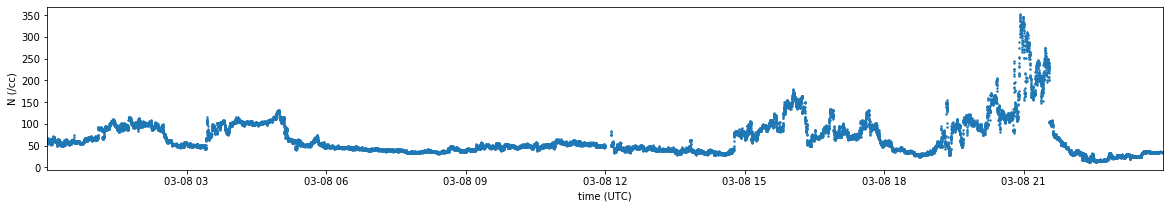

In [25]:
plt.rcParams["figure.figsize"] = (20,3) #define the size of the figure

plt.scatter(time, ion_density, s=2) #Make a scatter plot of ion density versus time 
plt.xlabel('time (UTC)') #X-axis title 
plt.ylabel('N (/cc)') #Y-axis title 
plt.xlim(time[0], time[-1]) #Limit of the X-axis
plt.show()

### Plot the ion bulk flow velocity versus time 

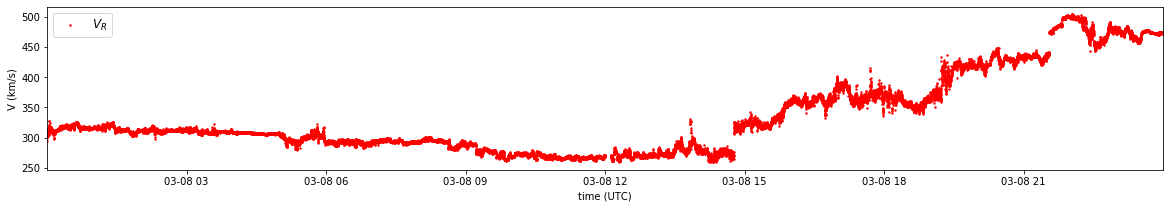

In [26]:
plt.scatter(time, Vr, s=2, color='r', label=r'$V_R$') #plot V_R component versus time
plt.xlabel('time (UTC)') #X-axis title 
plt.ylabel('V (km/s)') #Y-axis title 
plt.xlim(time[0], time[-1]) #Limit of the X-axis
plt.legend(fontsize=12)
plt.show()

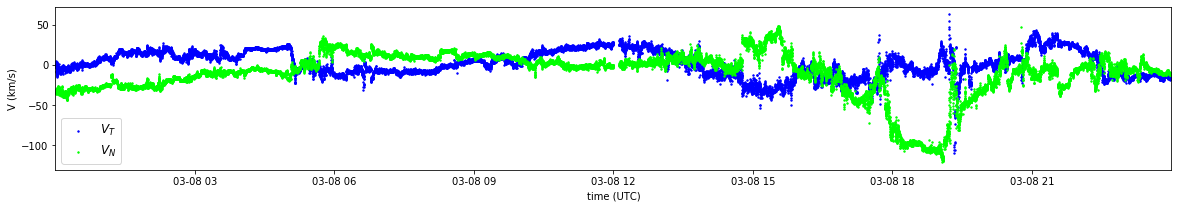

In [27]:
plt.scatter(time, Vt, s=2, color='b', label=r'$V_T$') #plot V_T component versus time
plt.scatter(time, Vn, s=2, color='lime', label=r'$V_N$') #plot V_R component versus time
plt.xlabel('time (UTC)') #X-axis title 
plt.ylabel('V (km/s)') #Y-axis title 
plt.xlim(time[0], time[-1]) #Limit of the X-axis
plt.legend(fontsize=12)
plt.show()

## Warning on ground-moment data caveats!
1. Ground calculated density and pressure tensor can be contaminated inside the solar wind velocity range from 260 to 380 km/s.  
2. Ground calculated density and pressure tensor are irrelevant for the solar wind velocity below 260 km/s.

To systematically monitor the data quality, the user is strongly recommended to look at the "**quality_factor**" parameter. *The lower the **quality factor** the better.* The following example shows the data quality factor in the secondary Y-axis of the ion radial velocity.

### Read in the data quality factor 

In [29]:
quality = ground_moment['quality_factor'][...]
print(quality)

[0.         0.         0.01064283 ... 0.         0.         0.        ]


### Make a plot of the data quality factor on top of the ion radial velocity
Ion radial velocity is shown in black (see labels on the left Y-axis).  
Quality factor is shown in red (see labels on the right Y-axis)

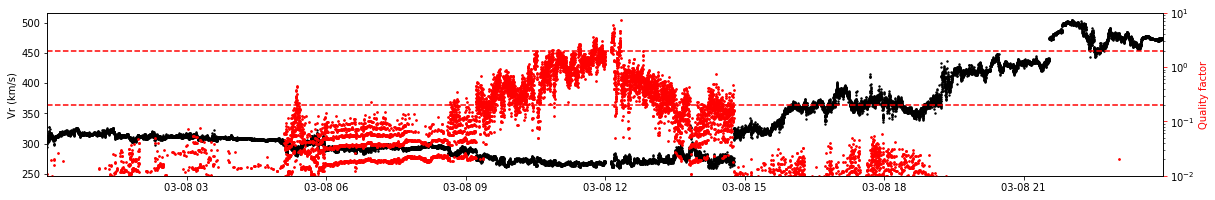

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(time, Vr, s=2, color='k', label=r'$V_R$')
ax.set_ylabel('Vr (km/s)', color='k')
ax.tick_params(axis='y', colors='k') 
ax.set_xlim(time[0], time[-1]) #Limit of the X-axis

secax = ax.twinx() #create a secondary axis for plotting the quality factor
secax.scatter(time, quality, s=3, color='r', label='quality factor')
secax.set_ylabel('Quality factor', color='r')
secax.tick_params(axis='y', color='r') 
secax.set_ylim(1e-2, 1e+1)
secax.set_yscale('log')
secax.axhline(y=0.2, ls='--', color='r') #lower threshold
secax.axhline(y=2.0, ls='--', color='r') #upper threshold

plt.show()

### Interpretation of the data quality factor 
> If the factor is less than 0.2 (the lower threshold), the data quality is generally good.   

> If the factor is exceeding 0.2 (the lower threshold) but less than 2.0 (the upper threshold), there can be some contamination of the data. In this case, the user should be careful about data interpretation. 

> If the factor is exceeding 2.0, there is a contamination of the data; the user must be extremely careful about data interpretation. 

In the example above, the quality factor of the middle interval exceeds 0.2; thus the user should be careful on the interpretation of this data interval. 

In [31]:
ground_moment.close() #close the CDF file

Now, we will read in the second file and plot its data. 
## Read in the CDF file for differential energy flux 

1D Differential Energy flux CDF file contain original velocity distribution function integrated over elevation and azimuth and converted to the differential energy flux. The value is expressed in cm^-2 s^-1 eV / eV.

To plot the ion differential energy flux, we need information on the energy table. 
PAS has 96 energy bins in total to cover the energy range from 200 eV to 20 KeV. The energy table is given by the parameter `Energy`. Since the instant sampling may cover just a part of the full energy range, the data record contains also the start and number of the energy bins (`start_energy`,`nb_energy`). 

To make a plot of the energy flux, we will import a Python module called "spectro" into this notebook as follows. 

In [32]:
from spectro import spectro_plot 
#help(spectro_plot)

In [33]:
diff_eflux = pycdf.CDF('Data-for-demo/solo_L2_swa-pas-eflux_20220308_V02.cdf')
print(diff_eflux) #to see parameters in the CDF file, along with their data types and dimensions 

Energy: CDF_REAL4 [96] NRV
Epoch: CDF_TIME_TT2000 [21512]
Half_interval: CDF_REAL4 [21512]
Info: CDF_UINT1 [21512]
SCET: CDF_REAL8 [21512]
delta_m_Energy: CDF_REAL4 [96] NRV
delta_p_Energy: CDF_REAL4 [96] NRV
eflux: CDF_REAL4 [21512, 96]
nb_energy: CDF_INT2 [21512]
quality_factor: CDF_REAL4 [21512]
start_energy: CDF_INT2 [21512]
total_count: CDF_REAL4 [21512]
unrecovered_count: CDF_REAL4 [21512]


### Retrieve time and energy table

In [34]:
time = diff_eflux['Epoch'][...]
energy_table = diff_eflux['Energy'][...]
print(energy)

[18450.5      17398.822    16407.09     15471.888    14589.988
 13758.356    12974.129    12234.612    11537.236    10879.615
 10259.478     9674.685     9123.228     8603.206     8112.822
  7650.391     7214.3184    6803.106     6415.328     6049.6553
  5704.8237    5379.649     5073.0107    4783.85      4511.1675
  4254.0283    4011.5527    3782.896     3567.269     3363.9368
  3172.194     2991.377     2820.8655    2660.0747    2508.4497
  2365.4714    2230.6394    2103.4893    1983.591     1870.5297
  1763.9104    1663.3638    1568.5496    1479.1431    1394.8345
  1315.3286    1240.3561    1169.6562    1102.9851    1040.1171
   980.8327     924.9216     872.1995     822.48584    775.60095
   731.3901     689.70306    650.3899     613.3159     578.3611
   545.3951     514.3035     484.99127    457.348      431.27936
   406.69476    383.5099     361.64926    341.03827    321.60147
   303.2694     285.9818     269.67886    254.31061    239.8167
   226.14255    213.25328    201.09833  

Here, `eflux` is the omni-directional energy flux as a function of time. 

In [35]:
eflux = diff_eflux['eflux'][...]
#print(eflux)
#print(eflux.shape)
print(diff_eflux['eflux'].attrs) #see description of the "eflux" parameter

CATDESC: Energy Flux (Omni-directional) [CDF_CHAR]
DEPEND_0: Epoch [CDF_CHAR]
DEPEND_1: Energy [CDF_CHAR]
FIELDNAM: eflux [CDF_CHAR]
FILLVAL: -1e+31 [CDF_REAL4]
FORMAT: E10 [CDF_CHAR]
LABLAXIS: eflux [CDF_CHAR]
SCALETYP: log [CDF_CHAR]
UNITS: cm-2 s-1 eV/eV [CDF_CHAR]
VALIDMAX: 1000000000000.0 [CDF_REAL4]
VALIDMIN: 0.0 [CDF_REAL4]
VALIMIN: 0.0 [CDF_REAL4]
VAR_TYPE: data [CDF_CHAR]


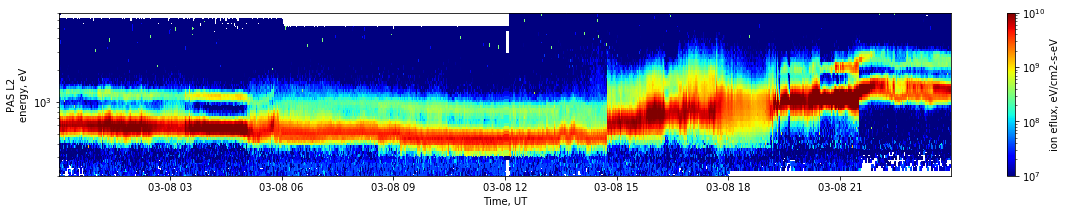

In [36]:
#### Plot using the "spectro" function with input parameters "eflux", "time", and "(energy) channels" ####
ax = spectro_plot(eflux, time, 
                  channels=energy_table, 
                  xlabel="Time, UT",
                  ylabel="PAS L2\nenergy, eV", 
                  zlabel="ion eflux, eV/cm2-s-eV",
                  yscale="log",
                  figsize=(20,3), cmap="jet",
                  vmin=1e7, vmax=1e10,
                  lognorm=True,
                 )
plt.ylim([2e2,7e3])
plt.show()

In [17]:
diff_eflux.close()

## Going further 

The SWA-PAS data user guide is available [HERE](https://swa-pas-data-user-guide.readthedocs.io/en/latest/measurements.html).  

We also have GUI tools for browsing and visualising data:  
    1. AMDA (http://amda.cdpp.eu/)
    2. CLweb (http://clweb.irap.omp.eu/) - we recommend this for automatic plotting of VDFs (see the instruction "Ploting-PAS-VDF_CLweb.pdf" in the same folder).
A user account is not required for browsing data, but to save them please send an email to request for an account.

If you have any queries, you may contact IRAP PAS team:  
  Rungployphan (Om) Kieokaew at rkieokaew@irap.omp.eu for general queries, or
  Philippe Louarn plouarn@irap.omp.eu (PAS P.I.)